<font color='blue'> **04__________________________________ Interactive_Variogram_h_Scatter** </font> 

In [6]:
import os; import sys ; from pathlib import Path    ; _R = Path("_R")   ; _R.mkdir(exist_ok=True); TA = Path('_R/04_Interactive_Variogram_h_Scatter_'); TA.mkdir(exist_ok=True)
import numpy as np    ; import pandas as pd ; import matplotlib.pyplot as plt ; import geostatspy.GSLIB as GSLIB   ; import geostatspy.geostats as geostats     ; import geostatspy
from ipywidgets import interactive ; from ipywidgets import widgets ; from ipywidgets import Layout ; from ipywidgets import Label ; from ipywidgets import VBox, HBox
REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  ; plt.rc('axes', axisbelow=True)   ; cmap = plt.cm.inferno 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) 
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

In [7]:
df = pd.read_csv(REF1/'1D_Porosity.csv') ; df.to_csv(TA/'1D_Porosity.csv') ; PD=pd.DataFrame(df['Nporosity'].describe()) ; PD.T 

,count,mean,std,min,25%,50%,75%,max
Nporosity,40.0,0.02225,0.992111,-2.08,-0.7575,0.14,0.7425,2.35


In [8]:
Depth = df['Depth']; NPOR = df['Nporosity'] ; NPOR = GSLIB.affine(NPOR,0.0,1.0) ; PE=pd.DataFrame(NPOR.describe()) ;  NPOR.to_csv(TA/'NPOR.csv') ; PE.T  # VAR = 1.0 

,count,mean,std,min,25%,50%,75%,max
Nporosity,40.0,0.0,1.012739,-2.14596,-0.795963,0.120198,0.735226,2.376149


In [9]:
df2=pd.DataFrame(NPOR); df2["NPOR"] = df2; df3=df2.drop('Nporosity', axis=1); PG=pd.concat([df, df3], axis=1) ;  PG['ratio'] = PG['NPOR'] / PG['Nporosity'] ; #PG.head(2)
#df['NPOR'], tvPor, tnsPor = geostats.nscore(df, 'Nporosity')    # ; df['NPOR']

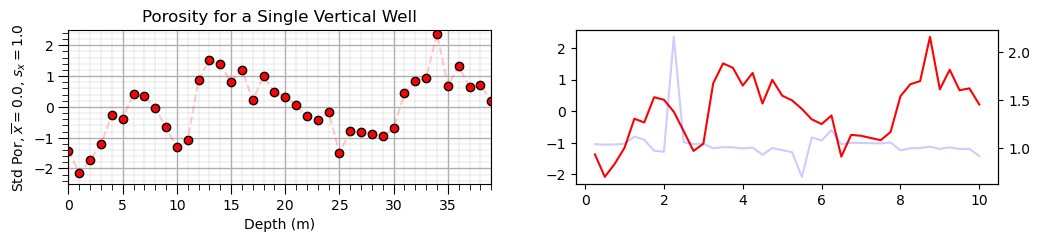

In [10]:
fig = plt.figure(figsize=(12,2))     
plt.subplot(121) ; plt.plot(NPOR,color='red',ls='--',alpha=0.2)   ; plt.scatter(np.arange(0,len(NPOR),1),NPOR,color='red',edgecolor='black')

plt.xlabel('Depth (m)'); plt.ylabel(r'Std Por, $\overline{x} = 0.0$, $s_x = 1.0$'); plt.title('Porosity for a Single Vertical Well')
plt.xlim([0,39]); plt.ylim([-2.5,2.5]); add_grid()

plt.subplot(122)  
ax1 = plt.gca()   ; ax1.plot(Depth,df['Nporosity'] ,color = 'r',label = 'All',zorder=10,  linestyle='-')          
ax2 = plt.twinx() ; ax2.plot(Depth,PG['ratio']     ,color = 'b',label = 'All',zorder=10,  linestyle='-',alpha=0.2)

In [11]:
l = widgets.Text(value='Variogram h-Scatterplot Demonstration, Prof. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='930px', height='30px'))
lag = widgets.IntSlider(min=1,max = 40,value=38,step = 1,description = 'Lag',orientation='horizontal',style = {'description_width': 'initial'},layout=Layout(width='940px',height='30px'),continuous_update=False)
ui2 = widgets.VBox([l,lag],)

def run_plot(lag):                                                                      # correlogram / h-scatterplot correlation coefficient

    size = 0.25   ; gamma_all = []; num_pairs_all = []
    for ilag in range(0,40):
        num_pairs_all.append(len((NPOR - NPOR.shift(ilag)).dropna()))                    ; gamma_all.append(np.average(np.square((NPOR - NPOR.shift(ilag)).dropna()))*0.5)    
        NPOR_shift = NPOR.shift(lag)                               ; correl = np.round(np.corrcoef(NPOR[~np.isnan(NPOR_shift)],NPOR_shift[~np.isnan(NPOR_shift)]),2)[0][1]

    fig = plt.figure(figsize=(3,2))     
    plt.subplot(121)
    plt.plot(NPOR,color='red',ls='--',alpha=0.2,zorder=1)  ;     n = 0
    for itail in range(0,len(NPOR)):
        if itail + lag < len(NPOR)-1:     plt.plot([itail,itail+lag],[NPOR[itail],NPOR[itail+lag]],color='b',alpha=0.1,zorder=1)  ; n = n + 1
    itail = 0.0 
    while itail < len(NPOR)-1:
        if itail + lag < len(NPOR)-1:      plt.plot([itail,itail+lag],[NPOR[itail],NPOR[itail+lag]],color='black',lw=2,zorder=2)
        itail = itail + lag + 1
    plt.scatter(np.arange(0,len(NPOR),1),NPOR,color='red',edgecolor='black',zorder=1)
    plt.xlabel('Depth (m)'); plt.ylabel(r'RO, $\overline{x} = 0.0$, $s_x = 1.0$')  ; plt.title('Pairs for Lag = ' + str(lag))
    plt.annotate('Number of Pairs = ' + str(n),[25,-2.3])                          ; plt.xlim([0,39]); plt.ylim([-2.5,2.5]); add_grid()
    
    plt.subplot(122)
    plt.scatter(NPOR,NPOR.shift(lag),color='darkorange',edgecolor='black',s=20)  ; plt.plot([-3,3],[-3,3],color='black')   ; plt.xlim([-3,3]); plt.ylim([-3,3]); 
    plt.title(r'h-Scatter Plot, lag = ' + str(lag) + r', $\bf{h} =$ ' + str(lag*size)) ;     plt.xlabel(r'$Z(\bf{u})$ Tail'); plt.ylabel(r'$Z(\bf{u}+ \bf{h})$ Head')
    plt.annotate(r'$\rho_{Z(\bf{u}),Z(\bf{u} + \bf{h})}$ = ' + str(correl),[1.0,-2.5],fontsize=12) ; add_grid() ;plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=0.9, wspace=0.2, hspace=0.3)
    plt.show()
    
interactive_plot = widgets.interactive_output(run_plot, {'lag':lag})   ; interactive_plot.clear_output(wait = True)    ; display(ui2, interactive_plot)

Output()